# FINAL PROJECT

For this final project, we worked on a dataset that has information on 52 sensors that monitor water pump of a small town that is far away from a big city. The water pump is important for the townspeople and it broke down 7 times last year that caused huge inconveniences for the people. The idea is to take that information and try to predict and classify the state of the water pump.

## About the dataset

This dataset is from Kaggle with the following features:
- 220320 rows
- 55 columns
- Classification problem
- Feature variables: sensor_00, sensor_01, sensor_02, ..., sensor_51
- Feature vairbales datatype: numerical
- Label variable: machine_status
- Label variable datatype: categorical ("NORMAL", "RECOVERING", "BROKEN")

We will be using <b>RandomForestClassifier</b> as well as <b>DNNClassifier</b> to achieve this goal.

In [1]:
# Common imports
import numpy as np
import pandas as pd
import sklearn as sk
import scipy.stats as sps
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# Set plotting options
%matplotlib inline
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "Project Saved Images"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
# read in the csv file
df = pd.read_csv ("sensor.csv")
df.shape

(220320, 55)

In [3]:
df.head()

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [4]:
# quick statistics on the dataset
df.describe()

,Unnamed: 0,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51
count,220320.000000,210112.000000,219951.000000,220301.000000,220301.000000,220301.000000,220301.000000,215522.000000,214869.000000,215213.000000,...,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,143303.000000,204937.000000
mean,110159.500000,2.372221,47.591611,50.867392,43.752481,590.673936,73.396414,13.501537,15.843152,15.200721,...,35.453455,43.879591,42.656877,43.094984,48.018585,44.340903,150.889044,57.119968,183.049260,202.699667
std,63601.049991,0.412227,3.296666,3.666820,2.418887,144.023912,17.298247,2.163736,2.201155,2.037390,...,10.259521,11.044404,11.576355,12.837520,15.641284,10.442437,82.244957,19.143598,65.258650,109.588607
min,0.000000,0.000000,0.000000,33.159720,31.640620,2.798032,0.000000,0.014468,0.000000,0.028935,...,22.135416,24.479166,25.752316,26.331018,26.331018,27.199070,26.331018,26.620370,27.488426,27.777779
25%,55079.750000,2.438831,46.310760,50.390620,42.838539,626.620400,69.976260,13.346350,15.907120,15.183740,...,32.812500,39.583330,36.747684,36.747684,40.509258,39.062500,83.912030,47.743060,167.534700,179.108800
50%,110159.500000,2.456539,48.133678,51.649300,44.227428,632.638916,75.576790,13.642940,16.167530,15.494790,...,35.156250,42.968750,40.509260,40.219910,44.849540,42.534720,138.020800,52.662040,193.865700,197.338000
75%,165239.250000,2.499826,49.479160,52.777770,45.312500,637.615723,80.912150,14.539930,16.427950,15.697340,...,36.979164,46.614580,45.138890,44.849540,51.215280,46.585650,208.333300,60.763890,219.907400,216.724500
max,220319.000000,2.549016,56.727430,56.032990,48.220490,800.000000,99.999880,22.251160,23.596640,24.348960,...,374.218800,408.593700,1000.000000,320.312500,370.370400,303.530100,561.632000,464.409700,1000.000000,1000.000000


Since the dataset does not have much context on each sensor that we can work out, we decided to assume that all data is normal. We will still check for skewness to better prepare for the training of the models.

# Cleaning and Exploring the Dataset

We will be cleaning and exploring the dataset as we go.

### Cleaning

In [5]:
# making copies as we progess
# this is to ensure a quick and safe way to revert back to an older dataframe version
df1=df.copy()

In [6]:
df1.drop(["Unnamed: 0", "timestamp"], axis=1, inplace=True)

In [7]:
# check for columns that has more than 20% missing value
for column in df1.columns:
    missing_data = df1[column].isna().sum() / len(df1) * 100
    if missing_data >= 20.0:
        print(column)

sensor_15
sensor_50


In [8]:
# remove columns with more than 20% missing value
df1.drop(['sensor_15', 'sensor_50'], axis=1, inplace=True)

In [9]:
# seeing that the label column does not have high missing value
# remove rows with any missing data
for column in df1.columns:
    df1 = df1[df1[column].notnull()]

In [10]:
# check if any columns, after cleaning, is left with missing data
for column in df1.columns:
    missing_data = df1[column].isna().sum() / len(df1) * 100
    if missing_data > 0.0:
        print(column)

In [11]:
# after cleaning, we see roughly 30,000 rows reductions
# this is fine since we have plenty of data to work with
df1.shape

(195815, 51)

### Exploring Correlation

Saving figure correlation heatmap


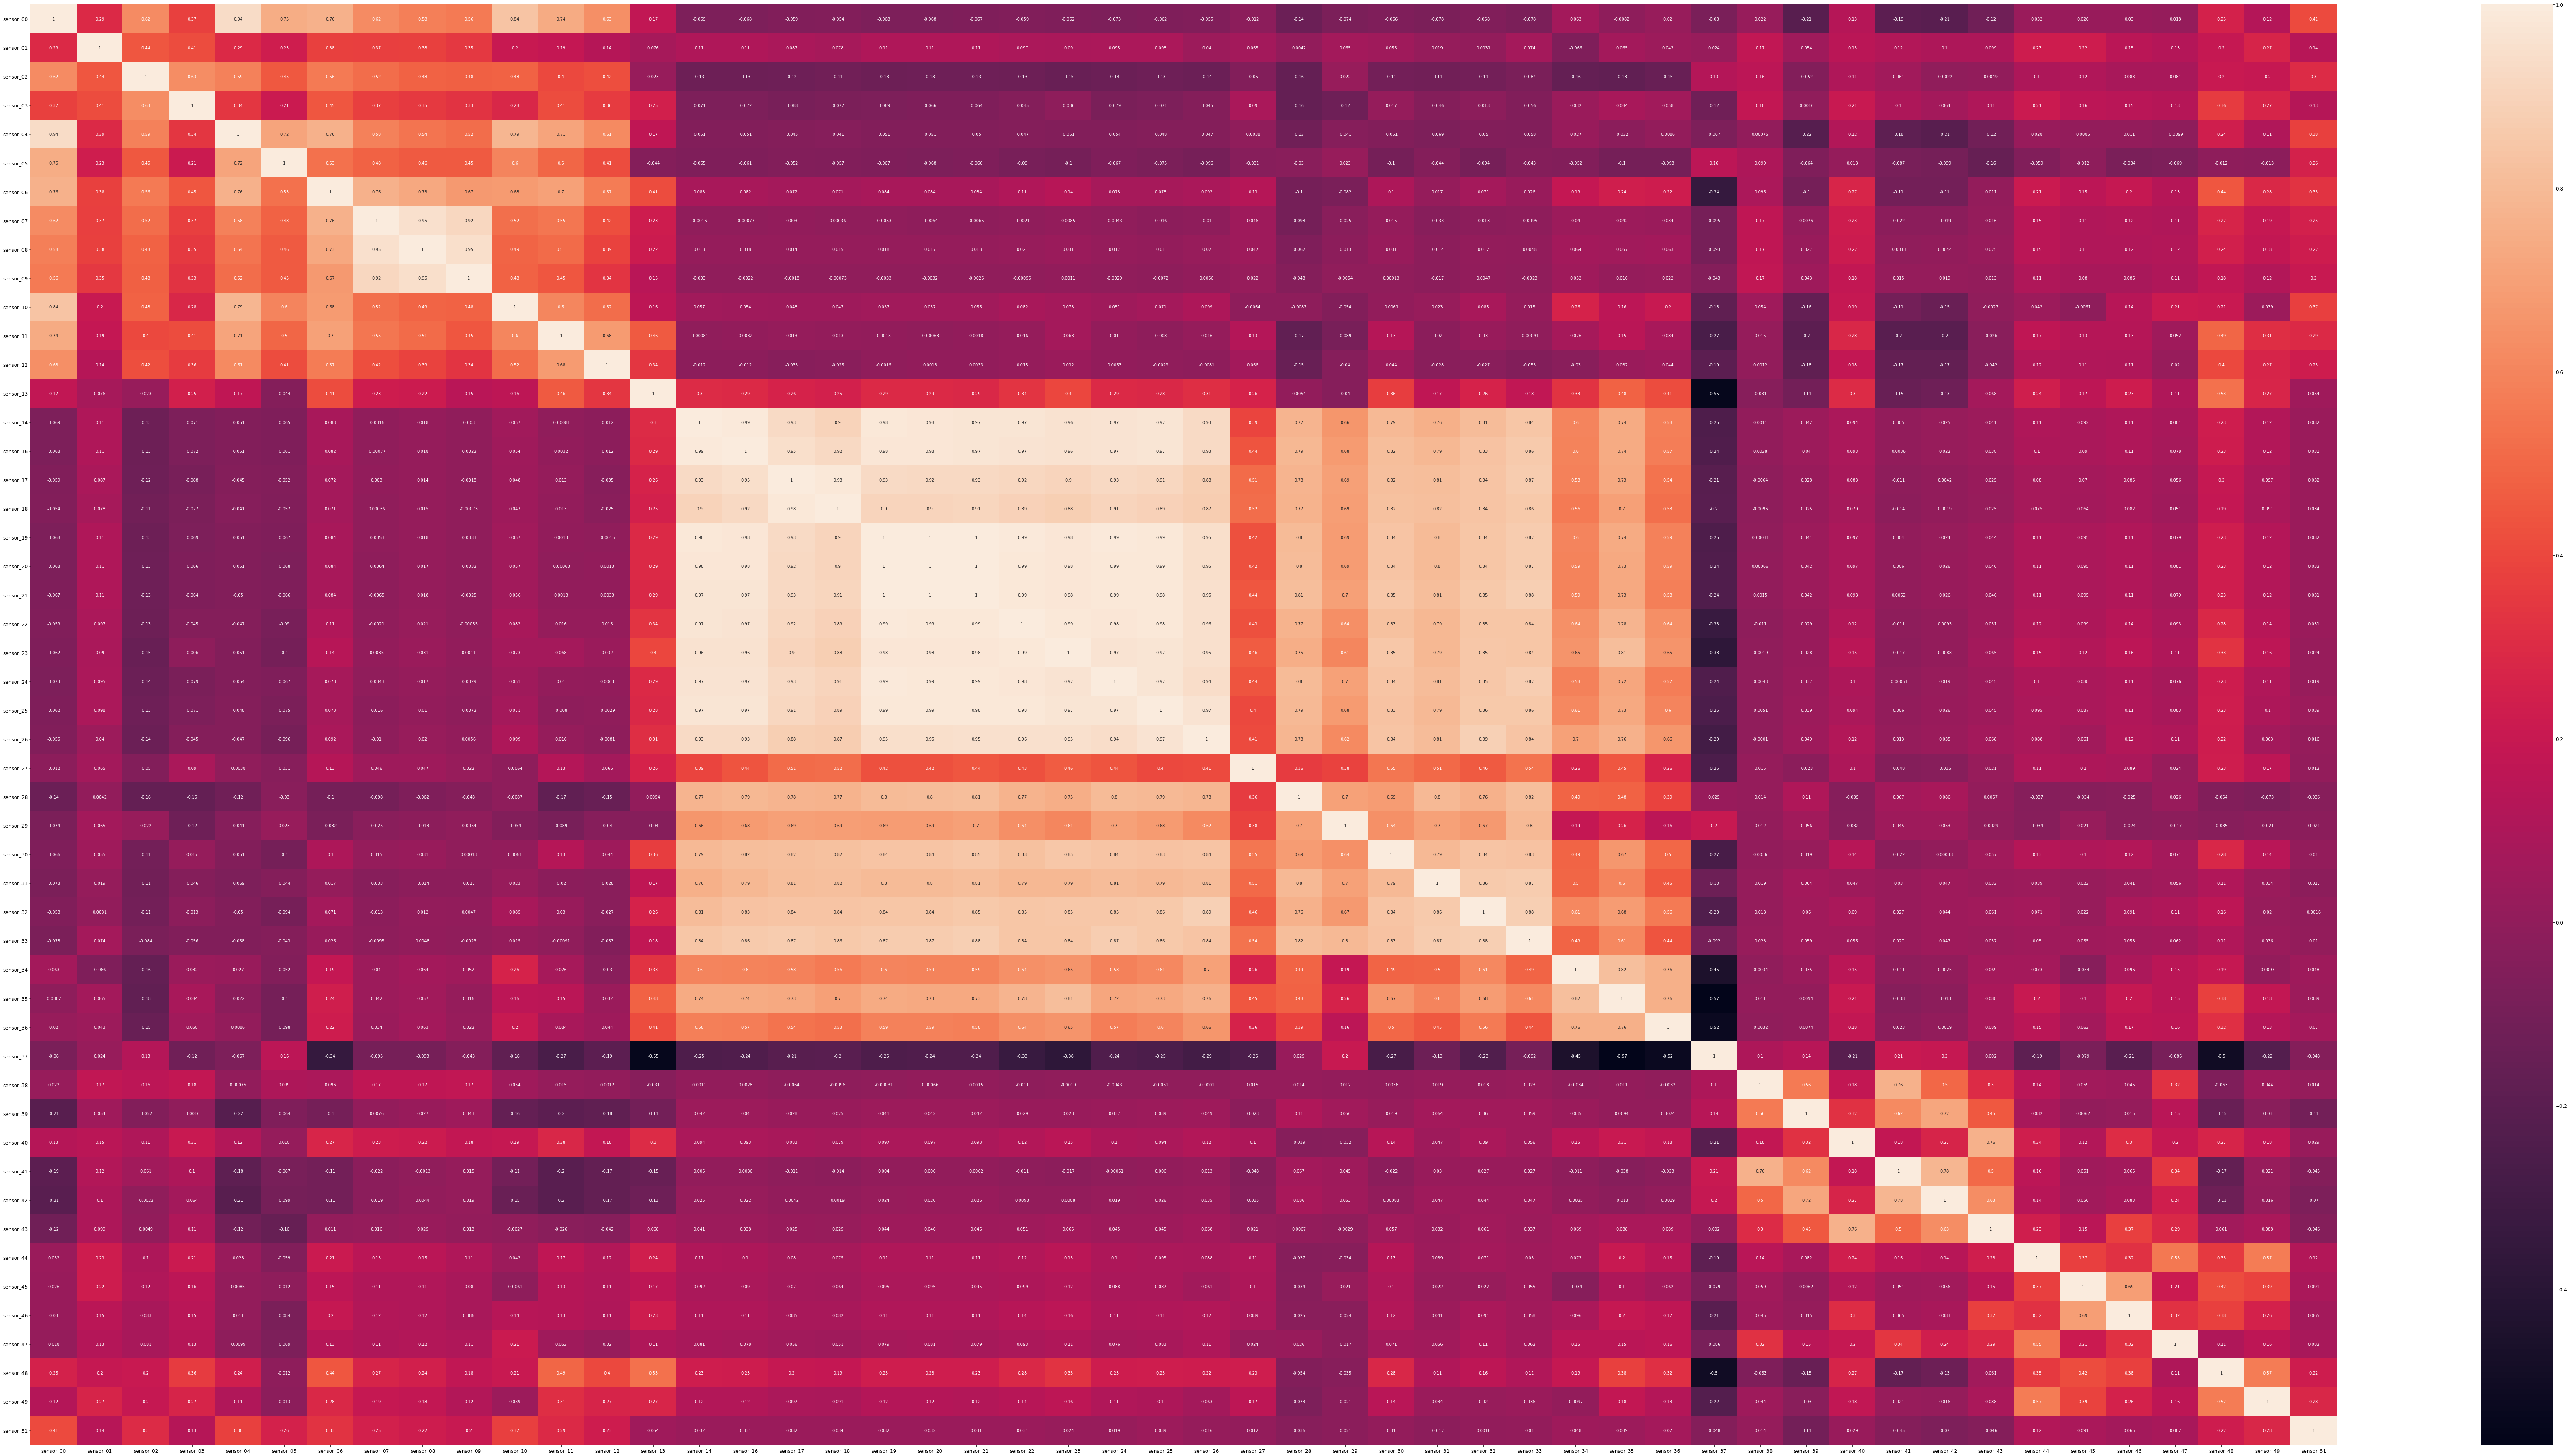

In [12]:
# exploring the correlation of the data features
# we decided to use the seaborn heatmap

var_Corr = df1.corr()
fig, ax = plt.subplots(figsize=(100,50)) 
sns.heatmap(var_Corr, xticklabels=var_Corr.columns, yticklabels=var_Corr.columns, annot=True, ax=ax)
save_fig("correlation heatmap")

This heatmap is promising as it shows a number of features with high correlation coefficient (lighter shades). This, although not a strong confirmation, promise a good predictive model.

In [13]:
#exploring label variabel
print(df1.machine_status.value_counts())
#exploring label variable in percentage
print(df1.machine_status.value_counts(normalize=True)*100)

NORMAL        192769
RECOVERING      3040
BROKEN             6
Name: machine_status, dtype: int64
NORMAL        98.444450
RECOVERING     1.552486
BROKEN         0.003064
Name: machine_status, dtype: float64


Saving figure label variable histogram


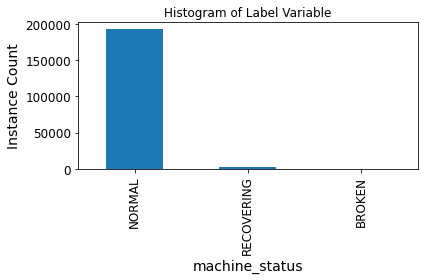

In [14]:
# plotting the label variables
df1['machine_status'].value_counts().plot(kind="bar", title="Histogram of Label Variable", xlabel="machine_status", ylabel="Instance Count")
save_fig("label variable histogram")

From the frequency histogram of the label variables, it can be seen clearly that the data is very imbalanced with the "NORMAL" label accounts for almost 99% of the entire dataset. We will be stratifying the dataset as well as putting weight on classes with lower frequency. We might also bin the two low-frequent lables.

Saving figure feature variables histograms


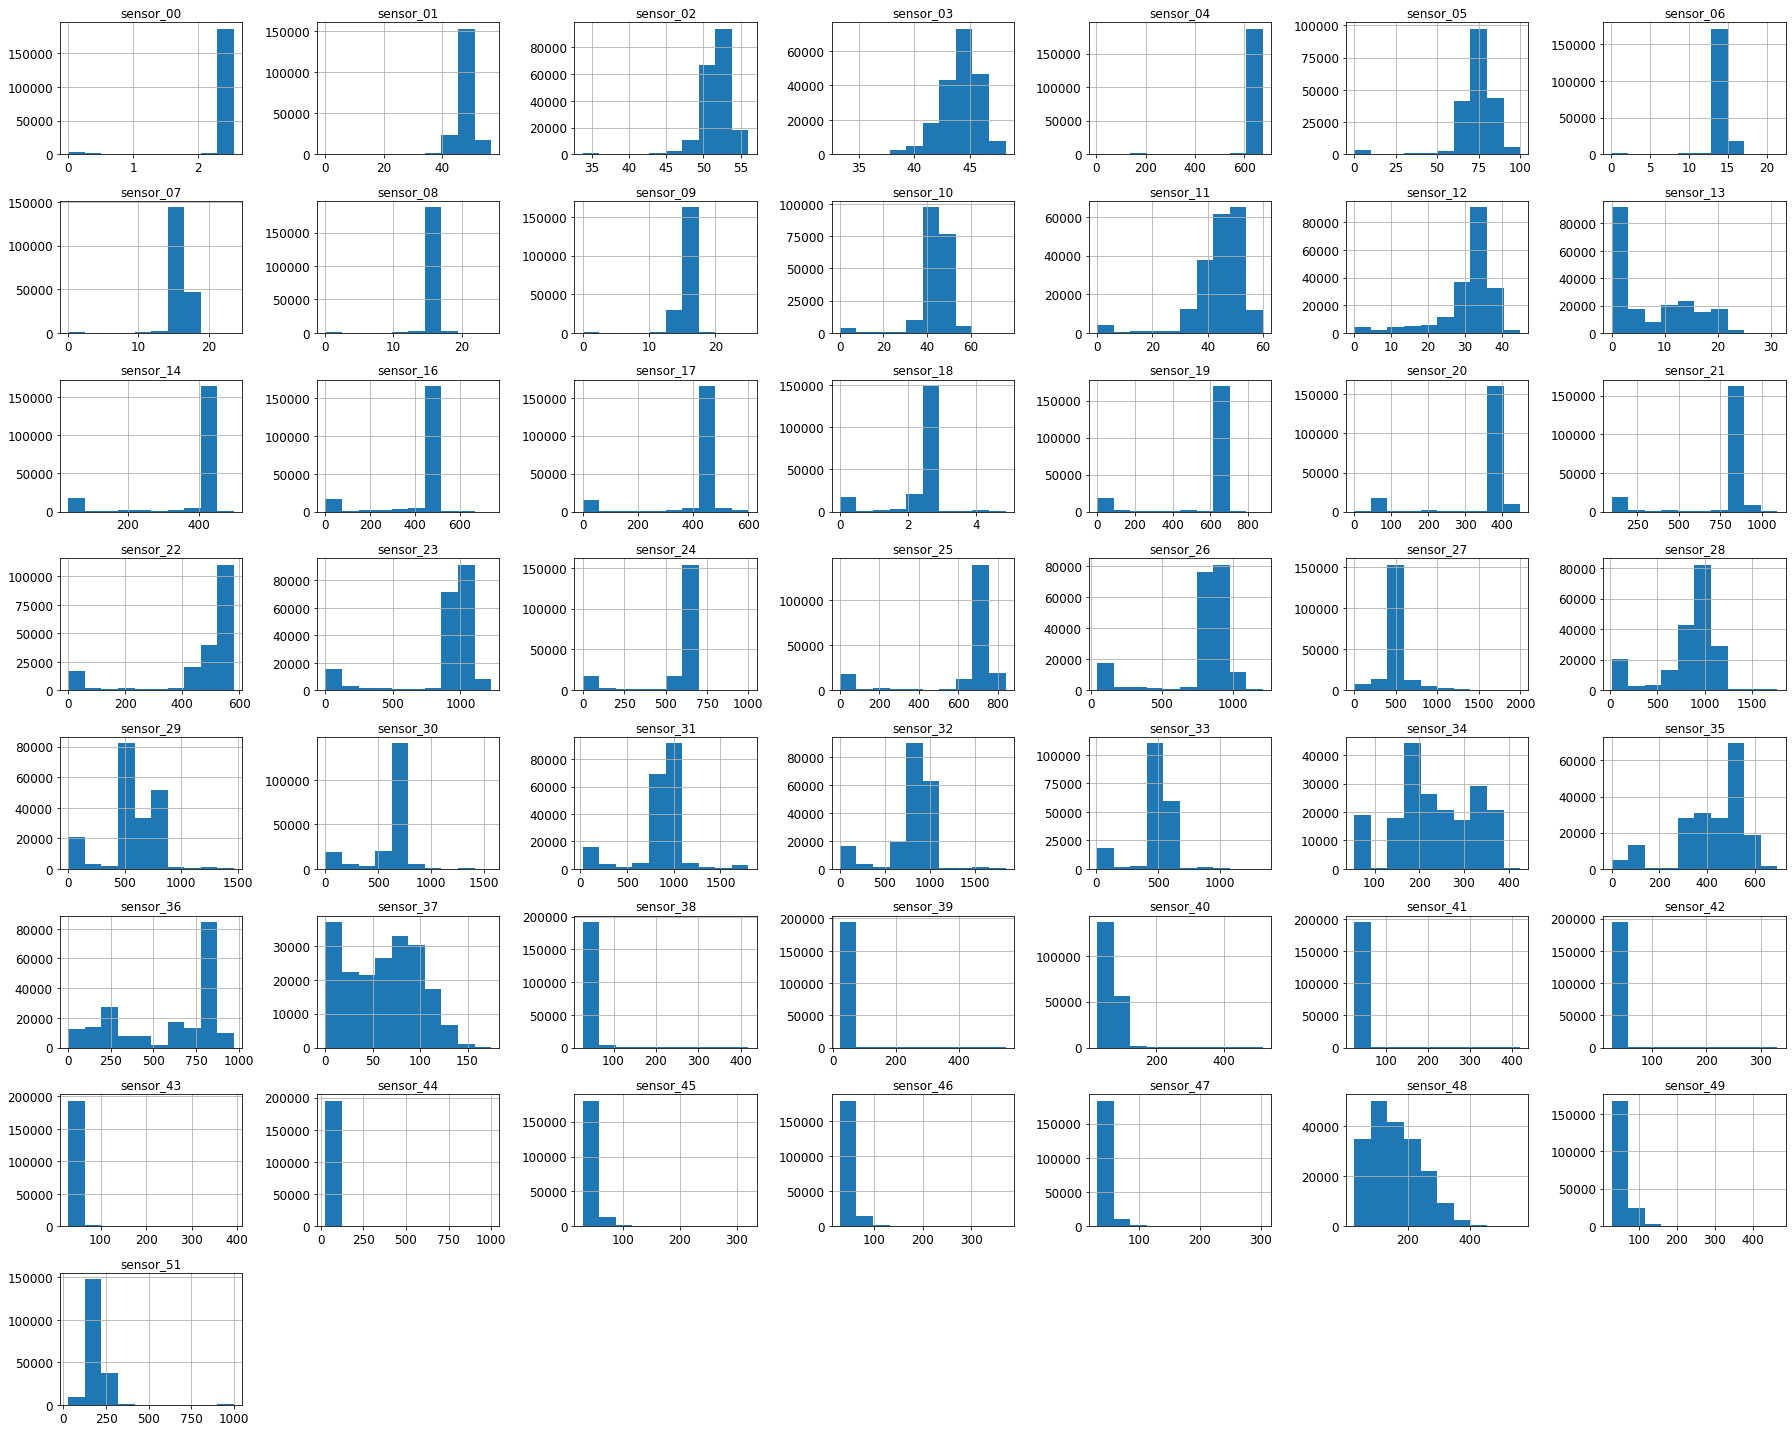

In [15]:
# histograms of all quantitative features
df1.hist(bins=10, figsize=(25, 20))
save_fig("feature variables histograms")

The histograms shows some features with high skewness values. We then decided to log-transform all those features to, hopefully, bring down the skewness values.

In [16]:
df2 = df1.copy()

In [17]:
# checking for the level of skewness 
# this is so we can decide what to do with them

# list out all columns with skewness level greater than 3
for column in df2.columns[:50]:
  if df1[column].skew(axis=0) > 3:
    print(column)

sensor_38
sensor_39
sensor_40
sensor_41
sensor_42
sensor_43
sensor_44
sensor_45
sensor_46
sensor_47
sensor_49
sensor_51


### Log-Tranform

In [18]:
# log-transform all columns with high skewness level

for column in df2.columns[:50]:
  if df1[column].skew(axis=0) > 3:
    df2["log_" + column] = np.log(df2[column])

In [19]:
# sensor_42 is still pretty skewed along with other sensors
# but we decided to keep it and move on since just one feature should not intefere with the prediction
# also the heatmap doesn't show any significant correlation with this feature

for column in df2.columns[51:]:
  print(column, ": ", df2[column].skew()) 

log_sensor_38 :  1.3550612190151505
log_sensor_39 :  3.9997369612206803
log_sensor_40 :  0.536601298362601
log_sensor_41 :  3.6133868766157464
log_sensor_42 :  5.0878681817407525
log_sensor_43 :  2.4576466735578135
log_sensor_44 :  2.027241398660117
log_sensor_45 :  2.201348775179904
log_sensor_46 :  1.930045095773209
log_sensor_47 :  2.2838123278453764
log_sensor_49 :  1.3948086826974475
log_sensor_51 :  -2.7555815467946


After log-transforming, sensor_39 and sensor_42 still has high skewness value (>3). Since the rest is decently low, we decided to keep the log results and move on.

In [20]:
df3 = df2.copy()

In [21]:
# drop columns that have been log-transformed

for column in df2.columns[:50]:
  if df1[column].skew(axis=0) > 3:
    df3.drop([column], axis=1, inplace=True)

In [22]:
# double checking the dataframe shape to make sure the process so far is correct
# number of column is still at 51 which is great!

df3.shape

(195815, 51)

In [23]:
# print the column names to make sure the log columns are added

df3.columns

Index(['sensor_00', 'sensor_01', 'sensor_02', 'sensor_03', 'sensor_04',
       'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08', 'sensor_09',
       'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14',
       'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20',
       'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24', 'sensor_25',
       'sensor_26', 'sensor_27', 'sensor_28', 'sensor_29', 'sensor_30',
       'sensor_31', 'sensor_32', 'sensor_33', 'sensor_34', 'sensor_35',
       'sensor_36', 'sensor_37', 'sensor_48', 'machine_status',
       'log_sensor_38', 'log_sensor_39', 'log_sensor_40', 'log_sensor_41',
       'log_sensor_42', 'log_sensor_43', 'log_sensor_44', 'log_sensor_45',
       'log_sensor_46', 'log_sensor_47', 'log_sensor_49', 'log_sensor_51'],
      dtype='object')

### Binning Label Variable

In [24]:
# binning the label into 2 groups
# 1: Normal
# 0: Recovering and Broken
# we do this because the label is imbalance
# and since a recovering sensor is still not getting any data from the pump

df3['machine_status'] = df3['machine_status'].map({'NORMAL':1 ,'RECOVERING':0, 'BROKEN':0})

Given the frequency table from earlier, we decided to bin "RECOVERING" and "BROKEN" together before splitting the data into train and test set. This allows for an easier binary-classification. Plus, we also hope that combining the two low frequency labels together would yields a better predictive result.

In [25]:
df4 = df3.copy()

# Preparing the Data

We will be using Binary Classification RandomForest and compare the result to Deep Neural Network with the possibility of exploring Recurrent Neural Network as well

### Spliting the dataset into train set and test set

In [26]:
# split the data into train and test
# we use stratified sampling since the label is imbalance even after binning
# we also set a random_state to ensure the results stay the same after each refresh

from sklearn.model_selection import train_test_split
X = df4.drop(["machine_status"], axis=1)
y = df4["machine_status"]
# y_array = np. tv array(df4["machine_status"]) 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size=0.25, stratify=y)

We introduced the stratified sampling method as well as random_state to try to balance the dataset when splitting. This is to prevent either the train or test set from having too many of the same label.

### Fitting RandomForest Model

In [27]:
# scaling is not necessary for RandomForest
# import necessary package for RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score,recall_score, confusion_matrix

# these 2 hyper-parameters will be later adjusted to see the different results
rf_clf = RandomForestClassifier(n_estimators = 5, max_depth = 10, class_weight="balanced", random_state=42)
# fitting randomForest
rf_clf.fit(X_train, y_train)
y_pred_rf_train = rf_clf.predict(X_train)

To further deal with the imbalance of the data, we introduced class_weight={0:63, 1:1} to prevent from the prediction of one label taking over the others. We can also use {"balanced"} so that we don't have to do the calculations.

Train RF Accuracy:  0.9987130688201769
Train RF Precision:  0.9988069911180558
Train RF Recall:  0.9987130688201769
Saving figure conf_matrix_rf train


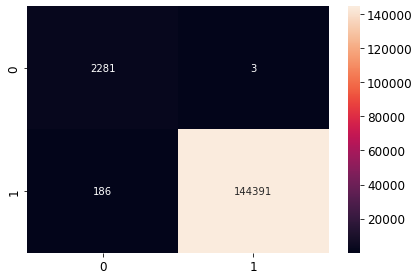

In [28]:
acc_rf_train = accuracy_score(y_train, y_pred_rf_train)
prec_rf_train = precision_score(y_train, y_pred_rf_train, average='weighted')
rec_rf_train = recall_score(y_train, y_pred_rf_train, average='weighted')

print("Train RF Accuracy: ", acc_rf_train)
print("Train RF Precision: ", prec_rf_train)
print("Train RF Recall: ", rec_rf_train)

# confusion matrix for RF train set
conf_matrix_rf = confusion_matrix(y_train, y_pred_rf_train)
sns.heatmap(conf_matrix_rf, annot=True, fmt="d") 



# both the confusion matrix and the score reflects really high prediction score
# if we were to get a 3 decimal, it would be a 1

# the confusion matrix shows that the model is able to predict
# most of the true positive and all of the true negative
save_fig("conf_matrix_rf train")

The training score is really good with the accuracy score of almost 1 considered we use statified sampling, binning label variables and adding class_weight when fitting the model. The confusion matrix shows the model predicts correctly almost all the instances (true positive). There is only one instance of false negative.

In [29]:
### RF for test set
y_predict_rf_test = rf_clf.predict(X_test)

acc_test_rf = accuracy_score(y_test, y_predict_rf_test)
prec_test_rf = precision_score(y_test, y_predict_rf_test, average='weighted')
rec_test_rf = recall_score(y_test, y_predict_rf_test, average='weighted')

Test RF Accuracy:  0.9984066674837603
Test RF Precision:  0.9985237345678462
Test RF Recall:  0.9984066674837603
Saving figure conf_matrix_rf test


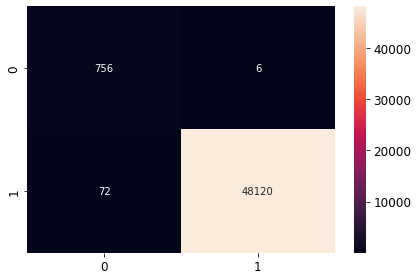

In [30]:
# confusion matrix for RF test set
conf_matrix_rf = confusion_matrix(y_test, y_predict_rf_test)
sns.heatmap(conf_matrix_rf, annot=True, fmt="d")

print("Test RF Accuracy: ", acc_test_rf)
print("Test RF Precision: ", prec_test_rf)
print("Test RF Recall: ", rec_test_rf)

# the test set also yields high prediction scores with RF model
# if we look at the decimal, it performs slightly worse but it is expected with test sets

# confusion matrix also reflects the same result
# most true positive and true negative are predicted
# some false positive and false negative exists but it's a very small sample
save_fig("conf_matrix_rf test")

The testing result is also good and only marginally worse if we look into the demicals. We can also see the slight degrade in performance when looking at the confusion matrix as the test set now has 4 instances of false negative.

In [31]:
y_train_1d = np.ndarray.flatten(y_train.values)

In [143]:
# Get Precision-Recall vs Threshold data 
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict

#rf_clf.predict_proba()
# dont need cv_predict maybe?
y_scores = cross_val_predict(rf_clf, X_train, y_train, cv=5)
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

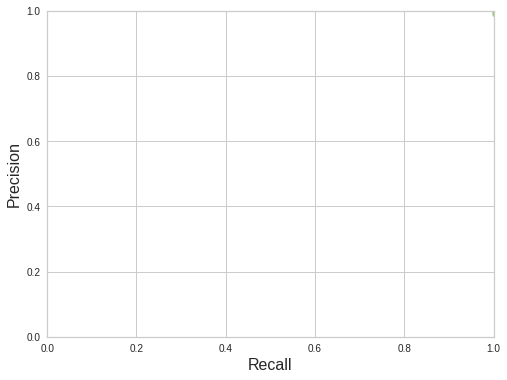

In [144]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "g-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

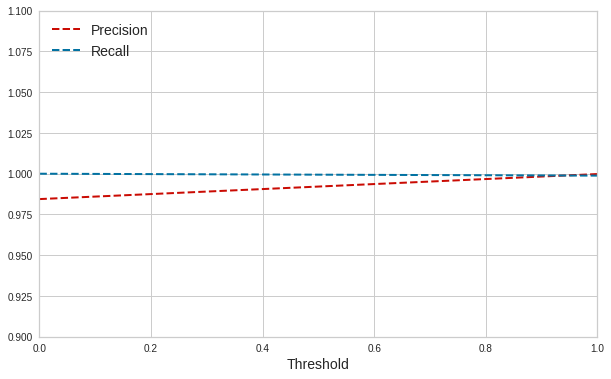

Saving figure rf precision-recall-threshold curve


<Figure size 576x396 with 0 Axes>

In [145]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "r--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "b--", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=14)
    plt.legend(loc="upper left", fontsize=14)
    plt.ylim([0.9, 1.1])

plt.figure(figsize=(10, 6))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([0, 1])
plt.show()
save_fig("rf precision-recall-threshold curve")

### Learning Curves for RandomForest

Saving figure rf acc learning curve


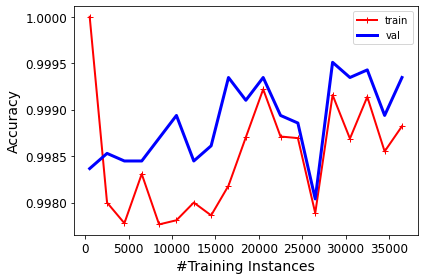

In [34]:
# Learning Curve plot using Acc
startobs = 500
increment = 2000

def plot_learning_curves(model, X, y, score_fun, score_label):
    X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.25, random_state=42)
    train_score,val_score, n_obs = [], [], []
    for m in range (startobs, len(X_train), increment):
        model.fit(X[:m], y[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_score.append(score_fun(y_train[:m], y_train_predict))
        val_score.append(score_fun(y_val, y_val_predict))
        n_obs.append(m)
        
    plt.plot(n_obs, train_score, "r-+", linewidth=2, label = "train")
    plt.plot(n_obs, val_score, "b-", linewidth = 3, label = "val")
    plt.legend()
    plt.xlabel("#Training Instances")
    plt.ylabel(score_label)

#check y train 0 variable

plot_learning_curves(rf_clf, X_test, y_test, accuracy_score, "Accuracy")
save_fig("rf acc learning curve")

Saving figure rf prec learning curve


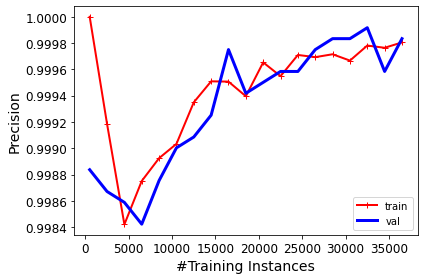

In [35]:
plot_learning_curves(rf_clf, X_test, y_test, precision_score, "Precision")
save_fig("rf prec learning curve")

Saving figure rf rec learning curve


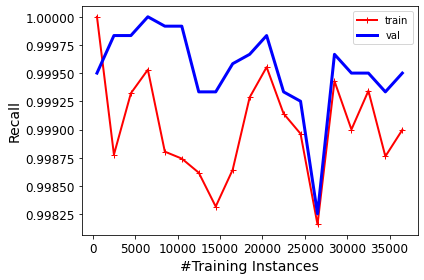

In [36]:
plot_learning_curves(rf_clf, X_test, y_test, recall_score, "Recall")
save_fig("rf rec learning curve")

Our learning curve for the Random Forest model is an epitome of machine learning as our predictive performance increases with an increase in training instances > 5000. There is also an interesting phenomenon between 25,000 and 30,000 training instances as there is a significance dip in performance.

### Fine-Tuning RandomForest

In [37]:
# Fine tuning the random forest classifier
# adjusting the hyper parameters yields different results
# since the normal RandomForest gives us really high prediction already
# this step is almost not needed

# but we decide to do it anyway
# we manually calculated n_estimators and max_depth
# and we landed at the below results
rand_f = RandomForestClassifier(n_estimators = 45, max_depth = 65, class_weight={0: 63, 1: 1})
rand_f.fit(X_train,y_train)
y_pred = rand_f.predict(X_train)
acc_train = accuracy_score(y_train,y_pred)
prec_train = precision_score(y_train,y_pred)
rec_train = recall_score(y_train,y_pred)

In [38]:
print("Accuracy:",acc_train)
print("Precision:",prec_train)
print("Recall:",rec_train)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


In [39]:
y_pred2 = rand_f.predict(X_test)
acc_test = accuracy_score(y_test,y_pred2)
prec_test = precision_score(y_test,y_pred2)
rec_test = recall_score(y_test,y_pred2)

In [40]:
print("Accuracy:",acc_test)
print("Precision:",prec_test)
print("Recall:",rec_test)

Accuracy: 0.9998161539404339
Precision: 0.9998755057578587
Recall: 0.999937749003984


Since our initial model already performed really well, fine-tuning it only gives it a marginal improvement (to the demical).

Saving figure fine tuned rf acc learning curve


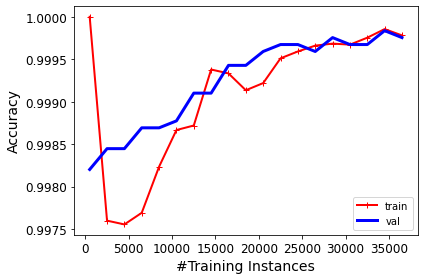

In [41]:
plot_learning_curves(rand_f, X_test, y_test, accuracy_score, "Accuracy")
save_fig("fine tuned rf acc learning curve")

Saving figure fine tuned rf prec learning curve


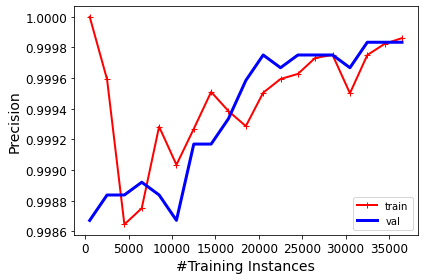

In [42]:
plot_learning_curves(rand_f, X_test, y_test, precision_score, "Precision")
save_fig("fine tuned rf prec learning curve")

Saving figure fine tuned rf rec learning curve


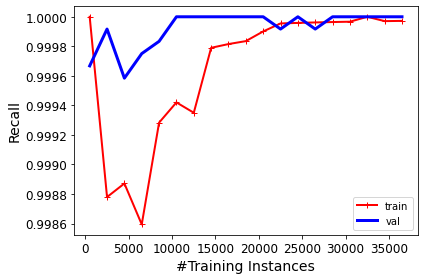

In [43]:
plot_learning_curves(rand_f, X_test, y_test, recall_score, "Recall")
save_fig("fine tuned rf rec learning curve")

Our learning curves perform slightly better as well after fine-tuning and we can see that there is no dip in performance around the 25,000 to 30,000 training instances. The drop at the earlier stage of the training is probably beause of the noises in the dataset.

### Deep Neural Network (DNN)

In [44]:
X_train.shape

(146861, 50)

In [45]:
import tensorflow as tf
print(tf.__version__)

1.15.0


In [46]:
pip install tensorflow==1.15

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [47]:
import tensorflow as tf
#tf.contrib is not available in tensorflow 2x
feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[150, 100], n_classes=10, feature_columns=feature_columns)
dnn_clf.fit(x=X_train, y=y_train, batch_size=150, steps=10000)

Instructions for updating:
Please specify feature columns explicitly.
Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please feed input to tf.data to support dask.
Instructions for updating:
Please access pandas data directly.
Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please convert numpy dtypes explicitly.
Instructions for updating:
Please specify feature columns explicitly.
Instructions for updating:
Please switch to tf.contrib.estimator.*_head.
Instructions for updating:
Please replace uses of any Estimator from tf.contrib.learn with an Estimator from tf.estimator.*
Instructions for updating:
When switching to tf.estimator.Estimator, use tf.estimator.RunConfig instead.
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f04fc34fdd0>, '_master': '',

Instructions for updating:
When switching to tf.estimator.Estimator, use tf.estimator.EstimatorSpec. You can use the `estimator_spec` method to create an equivalent one.
INFO:tensorflow:Create CheckpointSaverHook.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp8c9k2psl/model.ckpt.
INFO:tensorflow:loss = 565.14215, step = 1
INFO:tensorflow:global_step/sec: 141.523
INFO:tensorflow:loss = 11.024681, step = 101 (0.708 sec)
INFO:tensorflow:global_step/sec: 149.424
INFO:tensorflow:loss = 0.100086465, step = 201 (0.670 sec)
INFO:tensorflow:global_step/sec: 155.721
INFO:tensorflow:loss = 0.043727122, step = 301 (0.643 sec)
INFO:tensorflow:global_step/sec: 154.45
INFO:tensorflow:loss = 0.0, step = 401 (0.648 sec)
INFO:tensorflow:global_step/sec: 149.659
INFO:tensorflow:loss = 0

INFO:tensorflow:global_step/sec: 156.942
INFO:tensorflow:loss = 9.480584e-07, step = 7201 (0.638 sec)
INFO:tensorflow:global_step/sec: 157.984
INFO:tensorflow:loss = 4.974832e-05, step = 7301 (0.633 sec)
INFO:tensorflow:global_step/sec: 152.335
INFO:tensorflow:loss = 0.0010879165, step = 7401 (0.657 sec)
INFO:tensorflow:global_step/sec: 155.408
INFO:tensorflow:loss = 0.047224164, step = 7501 (0.642 sec)
INFO:tensorflow:global_step/sec: 164.28
INFO:tensorflow:loss = 0.0041472996, step = 7601 (0.609 sec)
INFO:tensorflow:global_step/sec: 145.752
INFO:tensorflow:loss = 0.0029819917, step = 7701 (0.687 sec)
INFO:tensorflow:global_step/sec: 161.18
INFO:tensorflow:loss = 1.4166874e-05, step = 7801 (0.619 sec)
INFO:tensorflow:global_step/sec: 163.078
INFO:tensorflow:loss = 0.0005227349, step = 7901 (0.613 sec)
INFO:tensorflow:global_step/sec: 158.949
INFO:tensorflow:loss = 8.742009e-09, step = 8001 (0.630 sec)
INFO:tensorflow:global_step/sec: 154.788
INFO:tensorflow:loss = 0.03375541, step = 8

DNNClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x7f0515077110>, 'hidden_units': [150, 100], 'feature_columns': (_RealValuedColumn(column_name='', dimension=50, default_value=None, dtype=tf.float64, normalizer=None),), 'optimizer': None, 'activation_fn': <function relu at 0x7f05efd247a0>, 'dropout': None, 'gradient_clip_norm': None, 'embedding_lr_multipliers': None, 'input_layer_min_slice_size': None})

Our evaluation of this model is down below after a few cells.

In [48]:
y_pred = list(dnn_clf.predict(X_train))
print("DNN Accuracy:", accuracy_score(y_train, y_pred))
print("DNN Precision:", precision_score(y_train, y_pred))
print("DNN Recall:", recall_score(y_train, y_pred))

Instructions for updating:
Please switch to predict_classes, or set `outputs` argument.
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp8c9k2psl/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
DNN Accuracy: 0.9974329468000354
DNN Precision: 0.9979969609062025
DNN Recall: 0.9993982445340546


Our DNN predictive model gives out surprising predictive scores as well. But it performs slightly worse, again to the decimal, when we look at the confusion matrix below.

Saving figure conf_matrix_dnn train


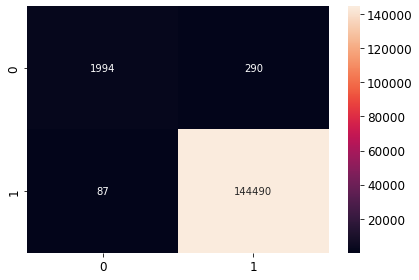

In [49]:
conf_matrix_DNN = confusion_matrix(y_train, y_pred)
sns.heatmap(conf_matrix_DNN, annot=True, fmt="d")
save_fig("conf_matrix_dnn train")

The train set wrongly predicts 290 instances compared to 1 instance in the random forest. But this is still a very good predictive model.

In [50]:
dnn_clf.evaluate(X_train, y_train)

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
INFO:tensorflow:Starting evaluation at 2021-12-14T20:43:50Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp8c9k2psl/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2021-12-14-20:43:53
INFO:tensorflow:Saving dict for global step 10000: accuracy = 0.99743295, glo

{'loss': 0.009219314, 'accuracy': 0.99743295, 'global_step': 10000}

With 100 epochs, 150 batch size, we get an average loss of 0.009 with a 0.99 accuracy score.

In [51]:
feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_test)
dnn_clf_test = tf.contrib.learn.DNNClassifier(hidden_units=[150, 100], n_classes=10, feature_columns=feature_columns)
dnn_clf_test.fit(x=X_test, y=y_test, batch_size=150, steps=10000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f05ccde8210>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/tmp/tmpedcvw6ak', '_session_creation_timeout_secs': 7200}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done run

INFO:tensorflow:global_step/sec: 165.47
INFO:tensorflow:loss = 4.1586365e-05, step = 7001 (0.605 sec)
INFO:tensorflow:global_step/sec: 161.102
INFO:tensorflow:loss = 0.027821124, step = 7101 (0.621 sec)
INFO:tensorflow:global_step/sec: 160.784
INFO:tensorflow:loss = 0.00013970619, step = 7201 (0.621 sec)
INFO:tensorflow:global_step/sec: 161.403
INFO:tensorflow:loss = 0.0019976164, step = 7301 (0.621 sec)
INFO:tensorflow:global_step/sec: 155.75
INFO:tensorflow:loss = 0.0, step = 7401 (0.642 sec)
INFO:tensorflow:global_step/sec: 139.535
INFO:tensorflow:loss = 5.0862436e-08, step = 7501 (0.717 sec)
INFO:tensorflow:global_step/sec: 146.41
INFO:tensorflow:loss = 6.2898376e-05, step = 7601 (0.683 sec)
INFO:tensorflow:global_step/sec: 139.485
INFO:tensorflow:loss = 4.977116e-06, step = 7701 (0.716 sec)
INFO:tensorflow:global_step/sec: 150.307
INFO:tensorflow:loss = 1.4702317e-07, step = 7801 (0.666 sec)
INFO:tensorflow:global_step/sec: 146.327
INFO:tensorflow:loss = 4.524976e-05, step = 7901 

DNNClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x7f04fc404fd0>, 'hidden_units': [150, 100], 'feature_columns': (_RealValuedColumn(column_name='', dimension=50, default_value=None, dtype=tf.float64, normalizer=None),), 'optimizer': None, 'activation_fn': <function relu at 0x7f05efd247a0>, 'dropout': None, 'gradient_clip_norm': None, 'embedding_lr_multipliers': None, 'input_layer_min_slice_size': None})

y_pred_test = list(dnn_clf.predict(X_test))
print("DNN Accuracy:", accuracy_score(y_test, y_pred_test))
print("DNN Precision:", precision_score(y_test, y_pred_test))
print("DNN Recall:", recall_score(y_test, y_pred_test))

Our test set performs better than our training set and it can be further seen through the confusion matrix below.

Saving figure conf_matrix_dnn test


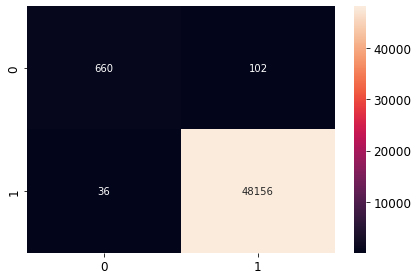

In [53]:
conf_matrix_DNN = confusion_matrix(y_test, y_pred_test)
sns.heatmap(conf_matrix_DNN, annot=True, fmt="d")
save_fig("conf_matrix_dnn test")

There are only 102 instance of false negative compared to the training set above.

In [54]:
dnn_clf.evaluate(X_train, y_train)

INFO:tensorflow:Starting evaluation at 2021-12-14T20:45:01Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp8c9k2psl/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2021-12-14-20:45:04
INFO:tensorflow:Saving dict for global step 10000: accuracy = 0.99743295, global_step = 10000, loss = 0.009219314


{'loss': 0.009219314, 'accuracy': 0.99743295, 'global_step': 10000}

In [56]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [57]:
# define the keras model
model = Sequential()
model.add(Dense(50, input_dim=50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [58]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [59]:
# fit the keras model on the dataset
history = model.fit(X_train, y_train, validation_split=0.25, epochs=100, batch_size=150)

Train on 110145 samples, validate on 36716 samples
Epoch 1/100
110145/110145 [==============================] - 3s 25us/sample - loss: 0.2236 - acc: 0.9905 - val_loss: 0.0950 - val_acc: 0.9912
Epoch 2/100
110145/110145 [==============================] - 3s 27us/sample - loss: 0.0722 - acc: 0.9937 - val_loss: 0.0231 - val_acc: 0.9971
Epoch 3/100
110145/110145 [==============================] - 3s 27us/sample - loss: 0.0407 - acc: 0.9951 - val_loss: 0.0245 - val_acc: 0.9958
Epoch 4/100
110145/110145 [==============================] - 3s 27us/sample - loss: 0.0293 - acc: 0.9955 - val_loss: 0.0327 - val_acc: 0.9944
Epoch 5/100
110145/110145 [==============================] - 3s 27us/sample - loss: 0.0274 - acc: 0.9955 - val_loss: 0.0214 - val_acc: 0.9958
Epoch 6/100
110145/110145 [==============================] - 3s 26us/sample - loss: 0.0192 - acc: 0.9959 - val_loss: 0.0135 - val_acc: 0.9970
Epoch 7/100
110145/110145 [==============================] - 3s 27us/sample - loss: 0.0160 - acc:

Epoch 58/100
110145/110145 [==============================] - 3s 23us/sample - loss: 0.0057 - acc: 0.9978 - val_loss: 0.0056 - val_acc: 0.9980
Epoch 59/100
110145/110145 [==============================] - 3s 27us/sample - loss: 0.0055 - acc: 0.9979 - val_loss: 0.0051 - val_acc: 0.9980
Epoch 60/100
110145/110145 [==============================] - 3s 27us/sample - loss: 0.0066 - acc: 0.9977 - val_loss: 0.0093 - val_acc: 0.9978
Epoch 61/100
110145/110145 [==============================] - 3s 25us/sample - loss: 0.0087 - acc: 0.9976 - val_loss: 0.0084 - val_acc: 0.9975
Epoch 62/100
110145/110145 [==============================] - 3s 26us/sample - loss: 0.0069 - acc: 0.9976 - val_loss: 0.0070 - val_acc: 0.9973
Epoch 63/100
110145/110145 [==============================] - 3s 26us/sample - loss: 0.0062 - acc: 0.9978 - val_loss: 0.0067 - val_acc: 0.9975
Epoch 64/100
110145/110145 [==============================] - 3s 27us/sample - loss: 0.0058 - acc: 0.9979 - val_loss: 0.0054 - val_acc: 0.9979

In [60]:
...
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


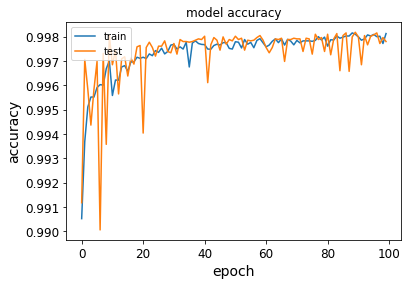

Saving figure keras model accuracy


<Figure size 432x288 with 0 Axes>

In [61]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
save_fig("keras model accuracy")

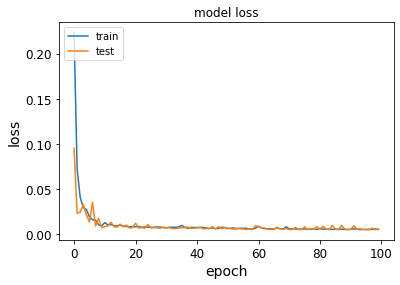

Saving figure keras model loss


<Figure size 432x288 with 0 Axes>

In [62]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
save_fig("keras model loss")

Our Keras Accuracy and Loss plots demonstrates that our DNN model minimizes loss with loss values in the range (0-0.2) and yields high accuracy averaging well over 99.5%

# Conclusion

- With the provided sensor data, we can predict the state of a water pump with over 99.9 % accuracy
- Both Random Forest and DNN have high precision, accuracy and recall scores. However, the Random Forest model performs marginally better on both train and test sets

## What can be improved

- Perform a multi-class classification instead of binary classification
- Try a Recurrent Neural Network 
- Attempt Anomaly Detection in time series
